###Goals:
- Kumpulan data ini bertujuan untuk memberikan pemahaman yang lebih baik mengenai perubahan kesehatan mental secara global selama periode waktu tertentu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
import sklearn
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Pastel1')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


##A. Apakah terdapat data yang dtype tidak sesuai?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

###Semua dtype sudah sesuai

##B. Apakah terdapat data yang mengalami duplicated?

In [4]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
292359    False
292360    False
292361    False
292362    False
292363    False
Length: 292364, dtype: bool

In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
292359    False
292360    False
292361    False
292362    False
292363    False
Length: 292364, dtype: bool

In [6]:
df.duplicated().sum()

363

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

###Data sudah tidak ada yang mengalami duplicated

##C. Apakah terdapat data yang mengalami missing values?

In [9]:
df.isna().sum().sort_values(ascending=False)

self_employed              5193
Timestamp                     0
Changes_Habits                0
mental_health_interview       0
Social_Weakness               0
Work_Interest                 0
Coping_Struggles              0
Mood_Swings                   0
Mental_Health_History         0
Growing_Stress                0
Gender                        0
Days_Indoors                  0
treatment                     0
family_history                0
Occupation                    0
Country                       0
care_options                  0
dtype: int64

##D. Apakah terdapat data yang mengalami outliers

In [10]:
df.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

###Tidak ada data yang menjadi numeric

#DATA INSIGHT

In [11]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [12]:
def barPerc(df,xVar,ax):
  numX=len([x for x in df[xVar].unique() if x==x])
  bars = ax.patches
  for ind in range(numX):
    hueBars=bars[ind:][::numX]
    total = sum([x.get_height() for x in hueBars])
    for bar in hueBars:
      ax.text(bar.get_x() + bar.get_width()/2.,
              bar.get_height(),
              f'{bar.get_height()/total:.0%}',
              ha="center",va="bottom")

##Gender vs Occupation

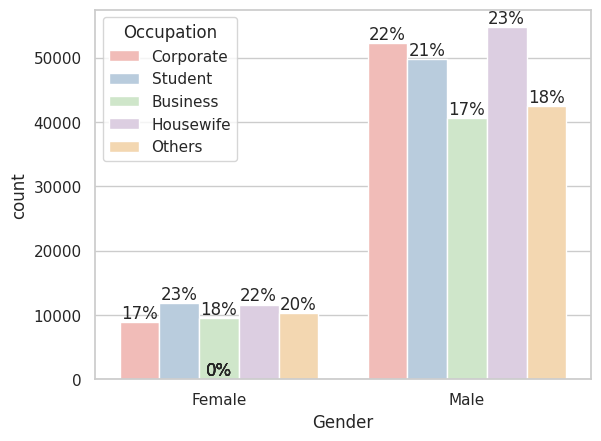

In [13]:
ax = sns.countplot(x='Gender', hue='Occupation', data=df)
barPerc(df,'Gender', ax)

###Untuk gender perempuan, yang mengisi paling banyak responden mengenai masalah mental health adalah siswa dan pada gender laki-laki, yang mengisi paling banyak respondennya yaitu karyawan

##Gender vs Family History

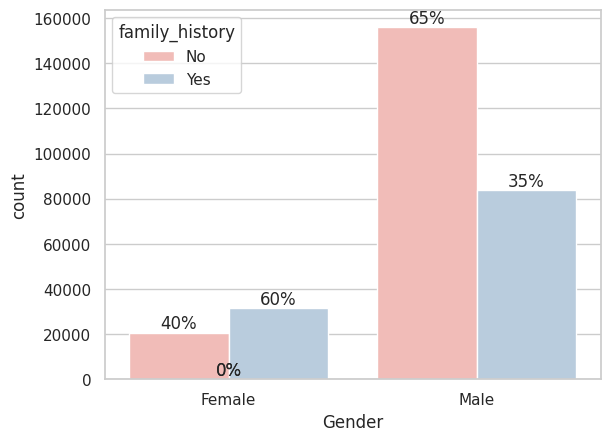

In [14]:
ax = sns.countplot(x='Gender', hue='family_history', data=df)
barPerc(df,'Gender', ax)

###Gender Perempuan lebih banyak mempunyai masalah mental health yang berasal dari latar belakang keluarga

##Gender vs Growing_Stress

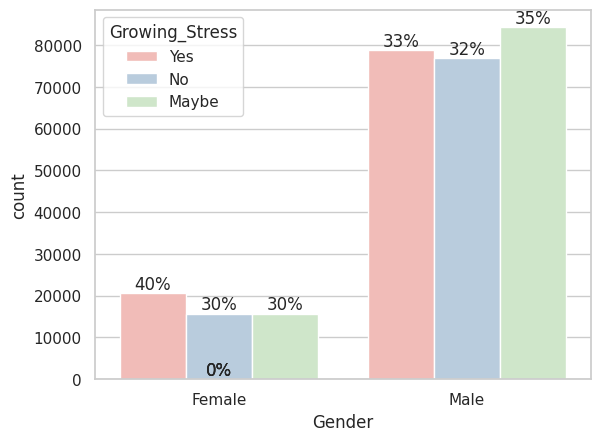

In [15]:
ax = sns.countplot(x='Gender', hue='Growing_Stress', data=df)
barPerc(df,'Gender', ax)

###Gender perempuan cenderung lebih sering mengalami peningkatan stress, sedangkan gender laki-laki cenderung bingung apakah mengalami peningkatan stress atau tidak

##Gender vs Changes_Habits

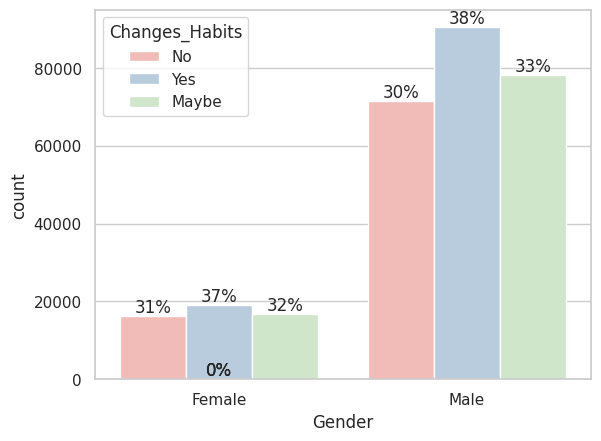

In [16]:
ax = sns.countplot(x='Gender', hue='Changes_Habits', data=df)
barPerc(df,'Gender', ax)

###Gender perempuan dan laki-laki yang mengalami masalah pada mental healthnya cenderung memiliki perubahan perilaku

##Gender vs Mental_Health_History

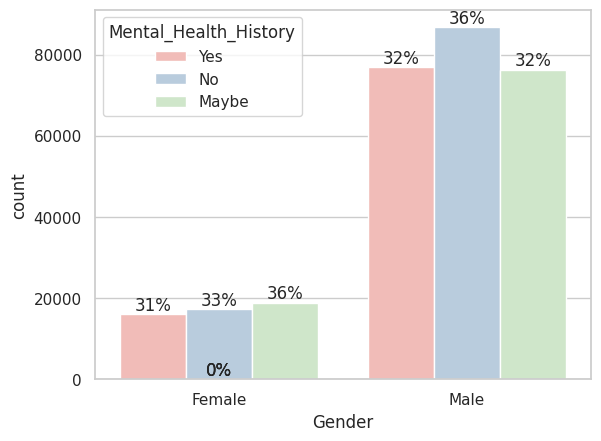

In [17]:
ax = sns.countplot(x='Gender', hue='Mental_Health_History', data=df)
barPerc(df,'Gender', ax)

###Gender perempuan cenderung bingung apakah memiliki riwayat masalah mental health atau tidak, sedangkan gender laki-laki cenderung tidak memiliki riwayat masalah mental health

##Gender vs Mood_Swing

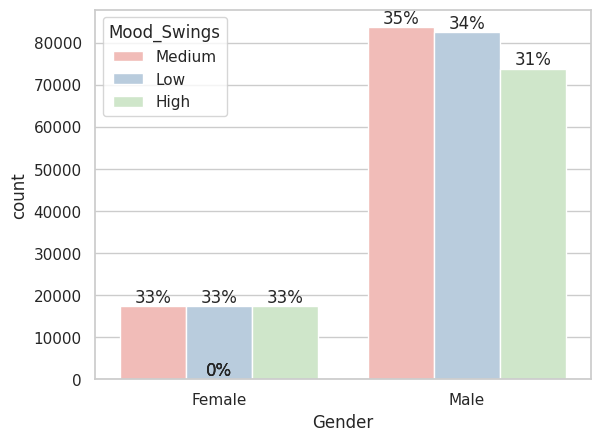

In [18]:
ax = sns.countplot(x='Gender', hue='Mood_Swings', data=df)
barPerc(df,'Gender', ax)

###Responden gender perempuan memiliki jawaban yang relatif sama mengenai perubahan mood, sedangkan responden gender laki-laki memiliki tingkat perubahan mood dalam tingkat medium

##Gender vs Work_Interest

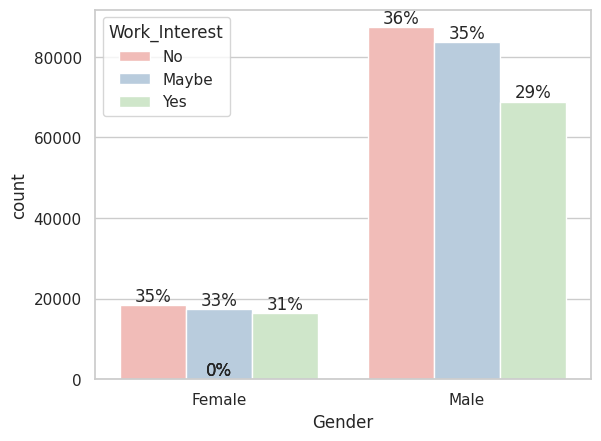

In [19]:
ax = sns.countplot(x='Gender', hue='Work_Interest', data=df)
barPerc(df,'Gender', ax)

###Responden perempuan dan laki-laki cenderung memiliki minat kerja yang rendah. Hal ini bisa berhubungan dengan mental health mereka

##Gender vs Social_Weakness

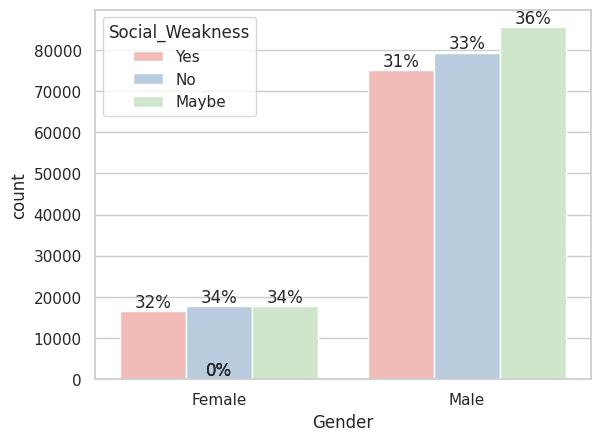

In [20]:
ax = sns.countplot(x='Gender', hue='Social_Weakness', data=df)
barPerc(df,'Gender', ax)

###Responden gender perempuan dan laki-laki cenderung tidak memiliki kelemahan dalam sosialisasi, tetapi sebagian kedua gender tersebut ada yang memiliki kelemahan dalam sosialisasi yang cukup tinggi

## Data Splitting :
- Data Train (Mempelajari data-data dan pola-pola) = 60%
- Data Validation (Untuk mengevaluasi data yang sudah ada di Data Train) = 20%
- Data Test (Untuk pengetesan kembali setelah data validation) = 20%

In [21]:
df = pd.read_csv('Mental Health Dataset.csv')
df.shape

(292364, 17)

In [22]:
from sklearn.model_selection import train_test_split
#Fungsi ini digunakan untuk membagi dataset menjadi dua subset: subset untuk pelatihan (training) dan subset untuk pengujian (testing), yang berguna dalam melakukan evaluasi mode

In [23]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

#train_test_split berfungsi untuk membagi variabel panggilan menjadi 2 jenis, yaotu df_full_train, df_test untuk code pertama dan df_train, df_valid untuk code kedua

In [24]:
df_train.shape, df_valid.shape, df_test.shape

((175418, 17), (58473, 17), (58473, 17))

In [25]:
175418/292364, 58473/292364, 58473/292364

(0.5999986318424977, 0.20000068407875116, 0.20000068407875116)

In [26]:
df.to_csv('Mental Health Dataset_new.csv', index=False)